### 1. Load tf model

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, regularizers, callbacks

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from utils.imagepreprocessing import ImagePreprocessing

In [3]:
model = models.load_model('models/flowers.keras')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         331,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,201 (4.55 MB)

 Trainable params: 397,733 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 795,468 (3.03 MB)

### 2. Prepering data

In [ ]:
ds_size = 3670
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
img_preproc = ImagePreprocessing(ds_size, batch_size, img_height, img_width)

In [ ]:
img_preproc.import_data()

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 3670 files belonging to 5 classes.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
class_names = img_preproc.get_class_names()

In [ ]:
train_ds, val_ds = img_preproc.get_train_val_ds()

In [ ]:
val_ds.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
y_test = np.concatenate([y for x, y in val_ds], axis=0)

In [ ]:
len(y_test)

734

In [ ]:
test_images = np.concatenate([x for x, y in val_ds], axis=0)

### 3. Predictions

In [ ]:
y_pred = model.predict(val_ds)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


In [ ]:
len(y_pred)

734

In [ ]:
len(y_pred.argmax(axis=1))

734

In [ ]:
bad_predictions = (y_pred.argmax(axis=1) != y_test.astype(int).reshape(-1))
good_predictions = (y_pred.argmax(axis=1) == y_test.astype(int).reshape(-1))

print('Ilość złych predykcji:', sum(bad_predictions))
print('Ilość dobrych predykcji: ', sum(good_predictions))
print(f"Skuteczność {round(sum(good_predictions) / len(y_test) * 100)}%")

Ilość złych predykcji: 63
Ilość dobrych predykcji:  671
Skuteczność 91%


### 4. LIME

In [ ]:
def show_lime_explanation(explanation, subset):
  explained_labels = explanation.local_exp.keys()

  fig, ax = plt.subplots(1, len(explained_labels) + 1)
  fig.set_size_inches(15, 5)
  fig.suptitle(f"Prawdziwa etykieta: {class_names[y_test[subset][i]]}")

  ax[0].imshow(image.astype("uint8"))
  ax[0].set_title(class_names[title])
  ax[0].axis('off')

  for j, label in enumerate(class_names):
        temp, mask = explanation.get_image_and_mask(j, positive_only=True, num_features=10, hide_rest=False)
        ax[j+1].imshow(mark_boundaries(temp.astype("uint8"), mask, color=(0, 255, 0), outline_color=(0, 0, 0)))
        ax[j+1].set_title(class_names[j])
        ax[j+1].axis('off')


def show_lime_heatmap(explanation, subset):
  explained_labels = explanation.local_exp.keys()

  fig, ax = plt.subplots(1, len(explained_labels) + 1)
  fig.set_size_inches(15, 5)
  fig.suptitle(f"Prawdziwa etykieta: {class_names[y_test[subset][i]]}")

  ax[0].imshow(image.astype("uint8"))
  ax[0].set_title(class_names[title])
  ax[0].axis('off')

  for j, label in enumerate(class_names):
    dict_heatmap = dict(explanation.local_exp[j])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    img = ax[j+1].imshow(heatmap, cmap = 'RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
    fig.colorbar(img, cmap = 'RdBu', ax=ax[j+1], shrink=0.5)
    ax[j+1].set_title(class_names[j])
    ax[j+1].axis('off')

In [4]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

c:\Users\Stanisław\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
i = 0
predictions_subset = bad_predictions

image = test_images[predictions_subset][i]
title = y_pred.argmax(axis=1)[predictions_subset][i]

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

In [ ]:
explanation = explainer.explain_instance(test_images[predictions_subset][i], model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

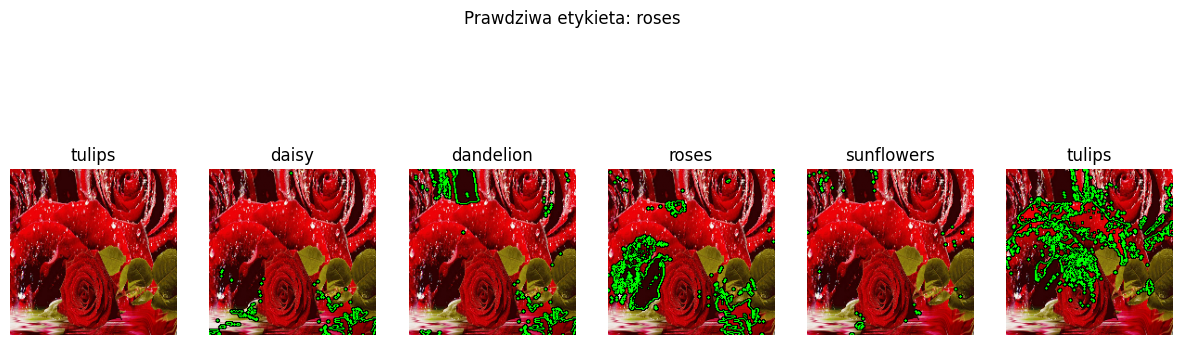

In [ ]:
show_lime_explanation(explanation, subset=predictions_subset)

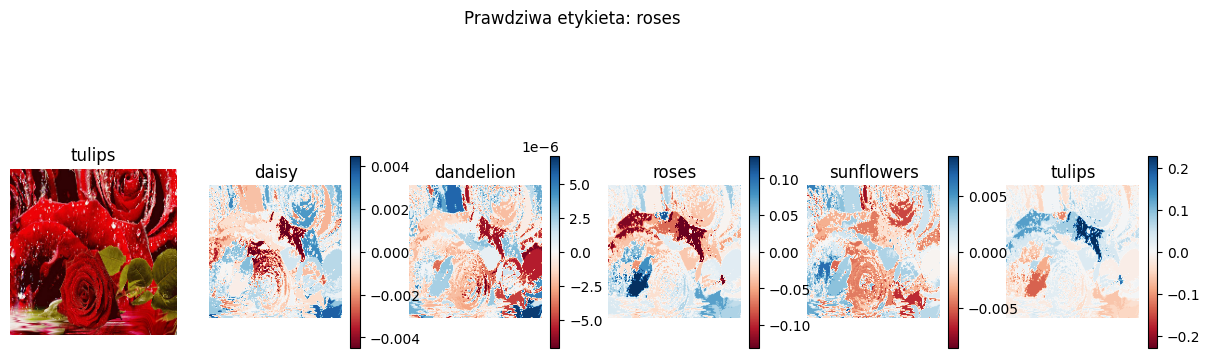

In [ ]:
show_lime_heatmap(explanation, subset=predictions_subset)

### 5. SHAP

In [ ]:
import shap

In [ ]:
def f(x):
  tmp = x.copy()
  return model(tmp)

In [ ]:
#Indeks przewidywanego zdjęcia
i = 0
predictions_subset = bad_predictions

image = test_images[predictions_subset][i]
title = y_pred.argmax(axis=1)[predictions_subset][i]

In [ ]:
masker = shap.maskers.Image("inpaint_ns", shape=test_images[0].shape)

In [ ]:
explainer = shap.Explainer(f, masker, output_names=class_names)

In [ ]:
shap_values = explainer(np.array([image]).astype("uint8"), max_evals=5000, batch_size=batch_size)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [02:56, 176.36s/it]              


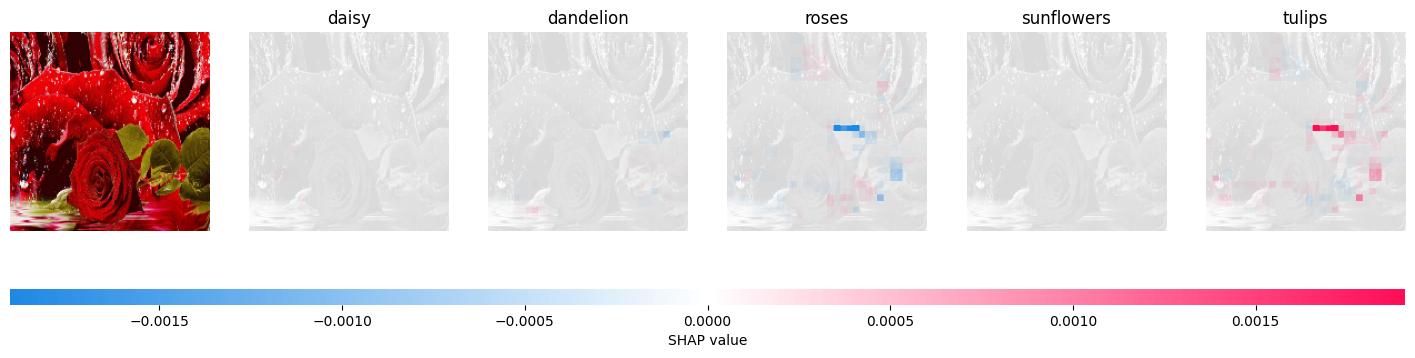

In [ ]:
shap.plots.image(shap_values)

### 6. Integrated gradients

In [ ]:
import PIL.Image
from matplotlib import pylab as P
import saliency.core as saliency

In [ ]:
class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            output_layer = model(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

In [ ]:
image = layers.Rescaling(1./255)(image)

In [ ]:
ig = saliency.IntegratedGradients()

In [ ]:
baseline = np.zeros(image.shape)

In [ ]:
image = layers.Rescaling(1./255)(image)
masks = []

for n in range(len(class_names)):
  call_model_args = {class_idx_str: n}
  integrated_gradients_mask_3d = ig.GetMask(image, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
  mask_grayscale = saliency.VisualizeImageGrayscale(integrated_gradients_mask_3d)
  masks.append(mask_grayscale)

Prawdziwa etykieta: roses


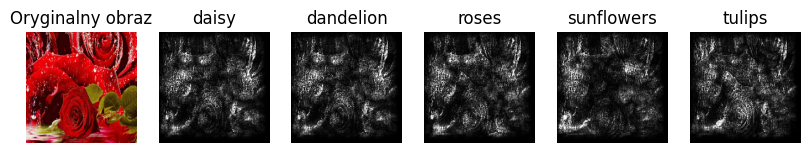

In [ ]:
i = 0
predictions_subset = bad_predictions
image = test_images[predictions_subset][i]

fig, ax = plt.subplots(1, len(class_names) + 1, figsize=(10, 5))

ax[0].imshow(image.astype("uint8"))
ax[0].axis('off')
ax[0].set_title("Oryginalny obraz")

for n, mask in enumerate(masks):
  ax[n+1].imshow(mask, cmap=plt.cm.gray, vmin=0, vmax=1)
  ax[n+1].axis('off')
  ax[n+1].set_title(class_names[n])

print(f"Prawdziwa etykieta: {class_names[y_test[predictions_subset][i]]}")
plt.show()